In [2]:
import numpy as np
import pandas as pd
import skimage
from skimage import io
import skimage.segmentation
import matplotlib.pyplot as plt
from skimage.color import rgb2lab
from skimage import img_as_ubyte

In [47]:
def pred_to_label(pred, cell_min_size, cell_label=1):
    # Only marks interior of cells (cell_label = 1 is interior, cell_label = 2 is boundary)
    cell=(pred == cell_label)
    # fix cells
    cell = skimage.morphology.remove_small_holes(cell, area_threshold=cell_min_size)
    cell = skimage.morphology.remove_small_objects(cell, min_size=cell_min_size)
    
    # label cells only
    [label, num] = skimage.morphology.label(cell, return_num=True)
    return label

# Sizedistribution plot of Aits images

In [58]:
img_list = '/home/maloua/Malou_Master/5_Models/2_Final_Models/data/4_filelists/filelist_all_aits_annotated_images.txt'
img_path = '/home/maloua/Malou_Master/5_Models/2_Final_Models/data/boundary_labels/'

results_aits = pd.DataFrame(columns=["Area"])

with open(img_list, 'r') as O1:
    for line in O1:
        line = line.rstrip()
        ground_truth = skimage.io.imread(img_path + line)
        ground_truth = np.argmax(ground_truth * [1, 1, 1], -1)    
        ground_truth = pred_to_label(ground_truth, 0)
        ground_truth = skimage.segmentation.relabel_sequential(ground_truth)[0]

        objects = len(np.unique(ground_truth))

        area_true = np.histogram(ground_truth, bins=objects)[0][1:]


        results_aits = pd.concat([results_aits, pd.DataFrame(data=np.asarray([area_true.copy()]).T, columns=["Area"])])
print(len(results_aits.index))


2094


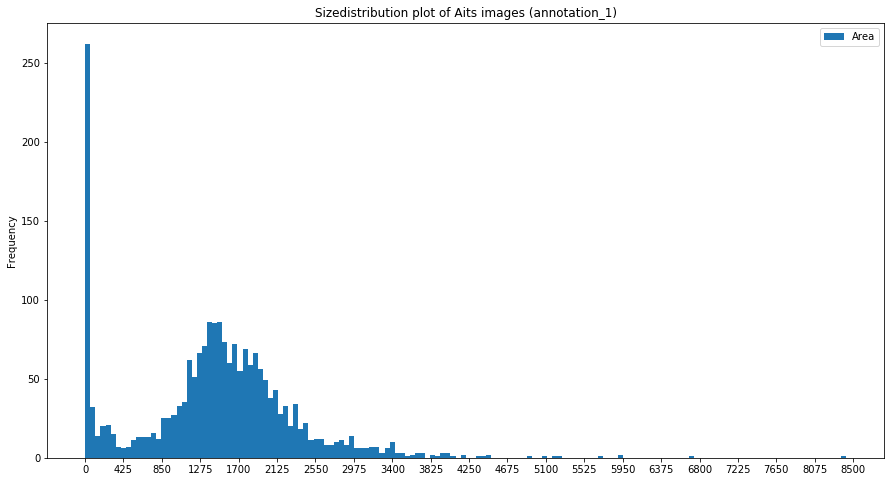

In [59]:
results_aits.plot.hist(bins = 150, figsize=(15,8), xticks = np.linspace(0,8500,21),title = 'Sizedistribution plot of Aits images (annotation_1)')

# Sizedistribution plot of BBBC images

In [60]:
img_list = '/home/maloua/Malou_Master/5_Models/2_Final_Models/data/4_filelists/BBBCIXM_images.txt'
img_path = '/home/maloua/Malou_Master/5_Models/2_Final_Models/data/boundary_labels/'

results = pd.DataFrame(columns=["Area"])

with open(img_list, 'r') as O1:
    for line in O1:
        line = line.rstrip()
        ground_truth = skimage.io.imread(img_path + line)
        ground_truth = np.argmax(ground_truth * [1, 1, 1], -1)    
        ground_truth = pred_to_label(ground_truth, 0)
        ground_truth = skimage.segmentation.relabel_sequential(ground_truth)[0]

        objects = len(np.unique(ground_truth))

        area_true = np.histogram(ground_truth, bins=objects)[0][1:]


        results = pd.concat([results, pd.DataFrame(data=np.asarray([area_true.copy()]).T, columns=["Area"])])
print(len(results.index))

23601


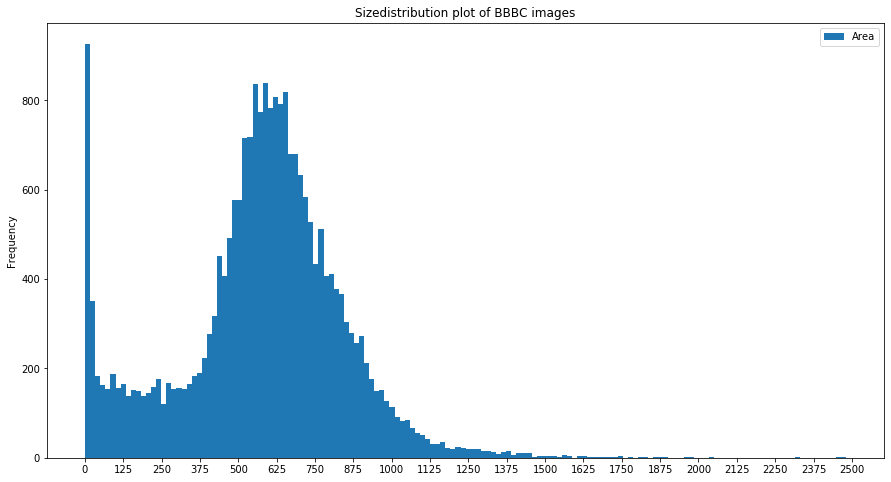

In [61]:
results.plot.hist(bins = 150, figsize=(15,8), xticks = np.linspace(0,2500,21), title = 'Sizedistribution plot of BBBC images')